# Prosper loan data exploration:

## - Dhriti Nirmal

### Preliminary wrangling

This data set contains information on peer to peer loans facilitated by credit company Prosper. This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#lets load the dataset, and print the statistics
df = pd.read_csv(r"C:\Users\Dell\Downloads\prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#shape of the data
df.shape

(113937, 81)

In [4]:
#load the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#descriptive stats of the dataframe
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
# Subset the dataframe by selecting features of interest, which here would be BorrowerAPR
column = ['LoanOriginalAmount','LoanStatus', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'Occupation','BorrowerRate']
df1 = df[column]

In [7]:
#show the new dataframe
df1.head()

,LoanOriginalAmount,LoanStatus,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,Occupation,BorrowerRate
0,9425,Completed,0.16516,3083.333333,36,NaN,Self-employed,Other,0.1580
1,10000,Current,0.12016,6125.000000,36,A,Employed,Professional,0.0920
2,3001,Completed,0.28269,2083.333333,36,NaN,Not available,Other,0.2750
3,10000,Current,0.12528,2875.000000,36,A,Employed,Skilled Labor,0.0974
4,15000,Current,0.24614,9583.333333,36,D,Employed,Executive,0.2085


In [8]:
#descriptive stats of the new dataframe
df1.describe()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,BorrowerRate
count,113937.00000,113912.000000,1.139370e+05,113937.000000,113937.000000
mean,8337.01385,0.218828,5.608026e+03,40.830248,0.192764
std,6245.80058,0.080364,7.478497e+03,10.436212,0.074818
min,1000.00000,0.006530,0.000000e+00,12.000000,0.000000
25%,4000.00000,0.156290,3.200333e+03,36.000000,0.134000
50%,6500.00000,0.209760,4.666667e+03,36.000000,0.184000
75%,12000.00000,0.283810,6.825000e+03,36.000000,0.250000
max,35000.00000,0.512290,1.750003e+06,60.000000,0.497500


In [9]:
#lets use .info to compare and check the missing values/null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113937 non-null  int64  
 1   LoanStatus             113937 non-null  object 
 2   BorrowerAPR            113912 non-null  float64
 3   StatedMonthlyIncome    113937 non-null  float64
 4   Term                   113937 non-null  int64  
 5   ProsperRating (Alpha)  84853 non-null   object 
 6   EmploymentStatus       111682 non-null  object 
 7   Occupation             110349 non-null  object 
 8   BorrowerRate           113937 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 7.8+ MB


As we can see ProsperRating (Alpha), BorrowerAPR, Employment Status and Occupation, so I'll drop those null values.

In [10]:
#drop the null values
df1 = df1.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [12]:
# Remove loans with missing borrower APR information
df1 = df1[~df1.BorrowerAPR.isna()]

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 0 to 84852
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  84853 non-null  int64  
 1   LoanOriginalAmount     84853 non-null  int64  
 2   LoanStatus             84853 non-null  object 
 3   BorrowerAPR            84853 non-null  float64
 4   StatedMonthlyIncome    84853 non-null  float64
 5   Term                   84853 non-null  int64  
 6   ProsperRating (Alpha)  84853 non-null  object 
 7   EmploymentStatus       84853 non-null  object 
 8   Occupation             83520 non-null  object 
 9   BorrowerRate           84853 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 7.1+ MB


In [14]:
df1.head()

,index,LoanOriginalAmount,LoanStatus,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,Occupation,BorrowerRate
0,1,10000,Current,0.12016,6125.000000,36,A,Employed,Professional,0.0920
1,3,10000,Current,0.12528,2875.000000,36,A,Employed,Skilled Labor,0.0974
2,4,15000,Current,0.24614,9583.333333,36,D,Employed,Executive,0.2085
3,5,15000,Current,0.15425,8333.333333,60,B,Employed,Professional,0.1314
4,6,3000,Current,0.31032,2083.333333,36,E,Employed,Sales - Retail,0.2712


### What is the structure of your dataset?
 The dataset contains 113,937 loans with 81 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others)

### What is the main feature of your dataset?
My main feature of interest is BorrowerAPR (The Borrower's annual percentage rate) and which factors affect this and predict this.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 I am assuming the original loan amount, Stated monthly income and their employment status will affect the APR. Rest I will find out ahead and draw my conclusions.

## Univariate Exploration:

 Distribution of the main variable of interest: borrower APR.

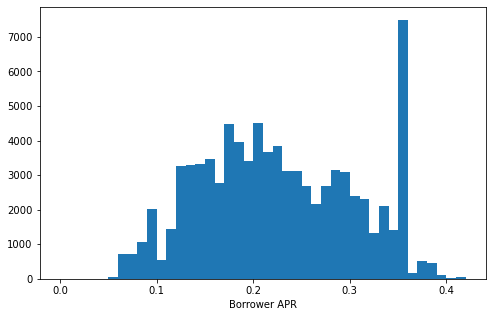

In [15]:
bins = np.arange(0,df1['BorrowerAPR'].max(),0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

This distribution is interesting, there is a small peak just before 0.1, two large peaks around 0.2. There is also a small peak centered 0.3. We also notice there are very few loans have APR greater than 0.4.


Distribution of the original loan amount: LoanOriginalAmount

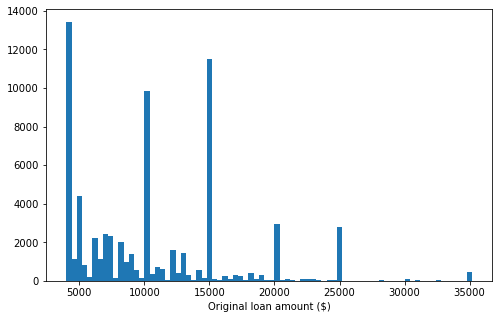

In [16]:
bins = np.arange(4000, df1.LoanOriginalAmount.max()+400, 400)
plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

I can see there are sharp peaks at 3k,5k, 10k, 15k and shorter peaks at 20k, 25k and 35k. There are also small spikes at 4k,8k,9k,11k,12k,13k,14k etc.


Lets look at the distribution of the Stated monthly income of borrowers:

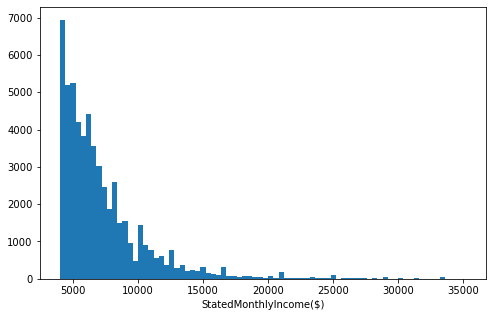

In [17]:
plt.figure(figsize=[8,5])
plt.hist(data = df1, x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('StatedMonthlyIncome($)');

The distribution of stated monthly income is severely right screwed, with most of stated monthly income less than 20k. Lets check how many people make more than 15k per month.

In [45]:
(df1[df1.StatedMonthlyIncome>15000]).value_counts()

index   LoanOriginalAmount  LoanStatus  BorrowerAPR  StatedMonthlyIncome  Term  ProsperRating (Alpha)  EmploymentStatus  Occupation         BorrowerRate
113910  4000                Current     0.32446      18756.000000         36    E                      Employed          Executive          0.2850          1
40748   6500                Completed   0.13545      18666.666667         36    A                      Employed          Executive          0.1074          1
41126   20000               Current     0.14714      17166.666667         36    A                      Employed          Executive          0.1189          1
41116   18224               Current     0.11319      17500.000000         60    AA                     Employed          Other              0.1110          1
41094   25000               Current     0.27554      16666.666667         60    C                      Employed          Architect          0.2498          1
                                                         

In [46]:
# Get percent of borrowers whose stated monthly income greater than 30k
(df1.StatedMonthlyIncome>30000).sum()/float(df1.shape[0])

0.0029344867005291504

In [75]:
# Get percent of borrowers whose stated monthly income more than 15k
(df1.StatedMonthlyIncome>15000).sum()/float(df1.shape[0])

0.026151108387446526

We can see there are only 2219 people (0.026% of people) who make more than 15k and less than 0.003% of people make more than 30k.

Lets check the employment status:

In [19]:
sorted_counts = df1['EmploymentStatus'].value_counts()
sorted_counts

Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

(-1.100120253843044,
 1.104977470598885,
 -1.1035756396571765,
 1.1015220847847524)

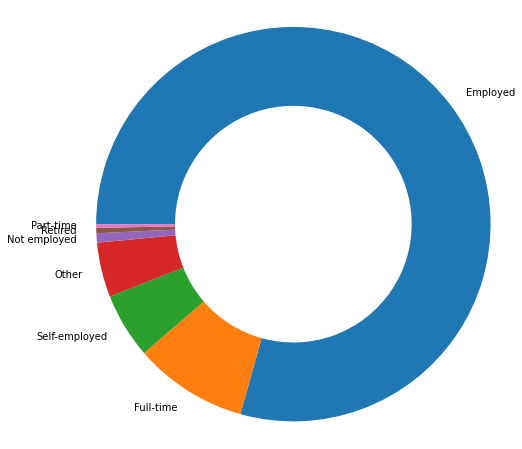

In [59]:
plt.figure(figsize = [12, 8])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 180, counterclock = False,wedgeprops = {'width':0.4});
plt.axis('square')

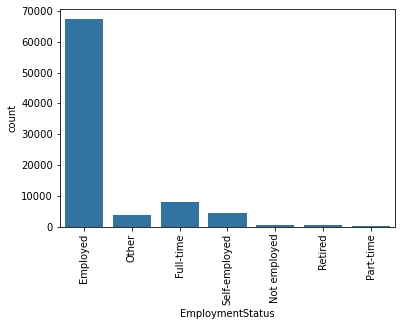

In [21]:
base_color = sns.color_palette()[0]
sns.countplot(data = df1, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);

The majority of borrowers are employed.

lets plot the occupations and draw conclusions:

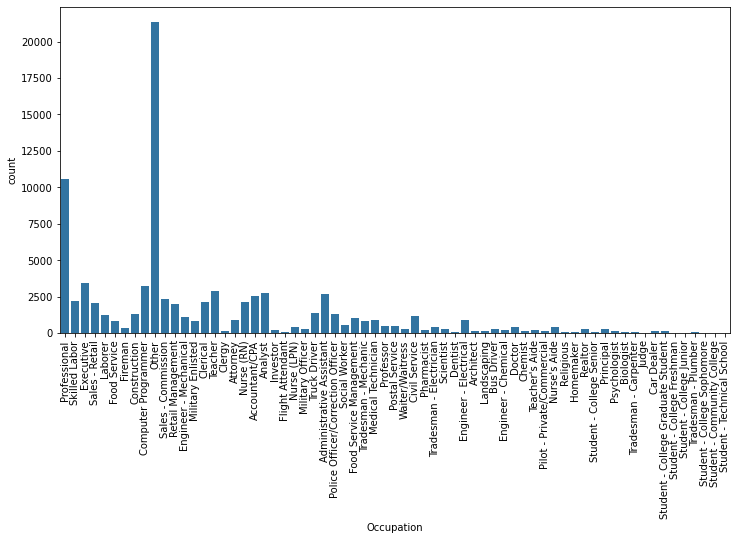

In [49]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [12, 6])
sns.countplot(data = df1, x = 'Occupation', color = base_color);
plt.xticks(rotation = 90);

We see the others category has the most number of borrowers and the next comes professionals. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
1. The distribution of borrowers APR looks multimodal.
2. Most of the values are at the range of 0.05 and 0.4.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
1. The distribution of stated monthly income is severely right screwed, with most of stated monthly income less than 20k.
2. We can see there are only 2219 people (0.026% of people) who make more than 15k and less than 0.003% of people make more than 30k.
3. The majority of borrowers are employed.

### Bivariate Exploration:

I'll try to plot a scatterplot using seaborn.
scatterplot between BorrowerAPR and LoanOriginalAmount:

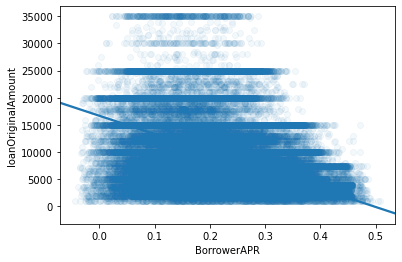

In [74]:
sns.regplot(data = df1, x = 'BorrowerAPR', y = 'LoanOriginalAmount', truncate=False, x_jitter = 0.1,scatter_kws = {'alpha':1/20});
plt.xlabel('BorrowerAPR')
plt.ylabel('loanOriginalAmount');

The scatter plot here shows a negative correlation between BorrowerAPR and LoanOriginalAmount which can imply to one thing, that is, the more the loan amount, the lower the APR.


I'll plot a boxplot between LoanStatus and LoanOriginalAmount to see the relation between the two variables:

<AxesSubplot:xlabel='LoanStatus', ylabel='LoanOriginalAmount'>

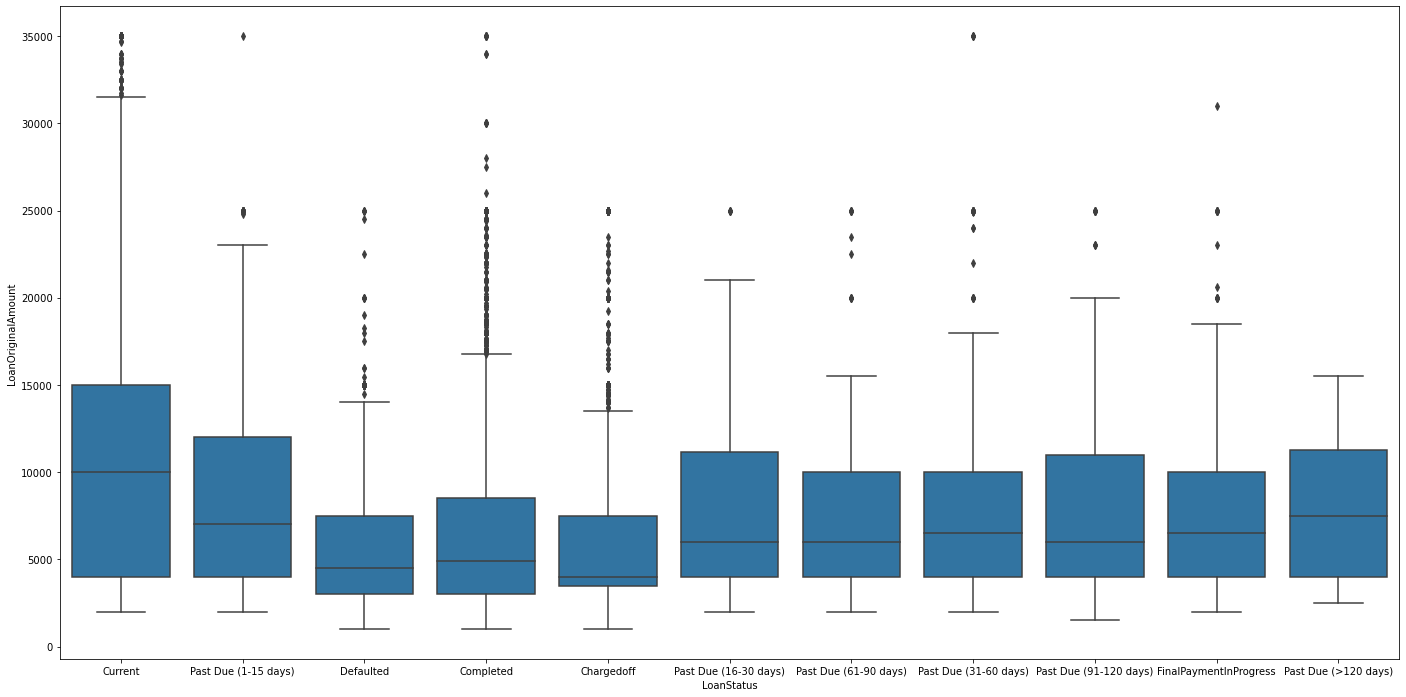

In [79]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [24, 12])
sns.boxplot(data = df1, x = 'LoanStatus', y= 'LoanOriginalAmount', color = base_color)

I see that the current loans have the most amount being taken and chargedoff has the least.

I'll look at the relationship between EmploymentStatus and ProsperRatingAlpha:

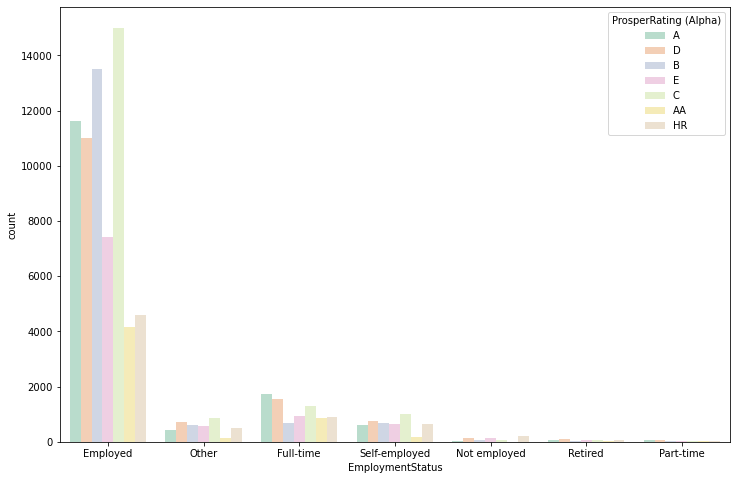

In [81]:
plt.figure(figsize = [12, 8])
sns.countplot(data = df1, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Pastel2');

The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with ProsperRating(Alpha).

I'll plot a boxplot to see the realtion between LoanOriginalAmount and EmploymentStatus:

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='EmploymentStatus'>

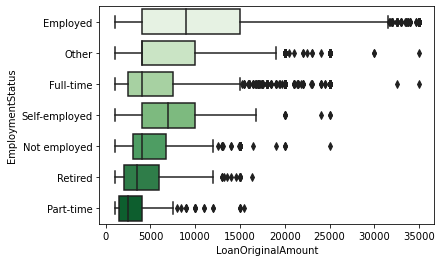

In [26]:
sns.boxplot(data = df1, x = 'LoanOriginalAmount', y= 'EmploymentStatus', palette = 'Greens')

I noticed that employed, self-employed and those who belong to others category borrowers have more monthly income and loan amount than part-time, retired,full time and not employed borrowers.


I'll plot a boxplot between Term and BorrowerAPR:

<AxesSubplot:xlabel='Term', ylabel='BorrowerAPR'>

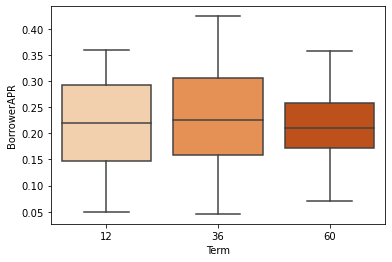

In [27]:
sns.boxplot(data = df1, x = 'Term', y= 'BorrowerAPR', palette = 'Oranges')

I notice that when the length of the loan in months is 36, the APR is the most and when the Term is 60, the APR is the least.


I'll plot a boxplot between EmploymentStatus and BorrowerAPR:

<AxesSubplot:xlabel='EmploymentStatus', ylabel='BorrowerAPR'>

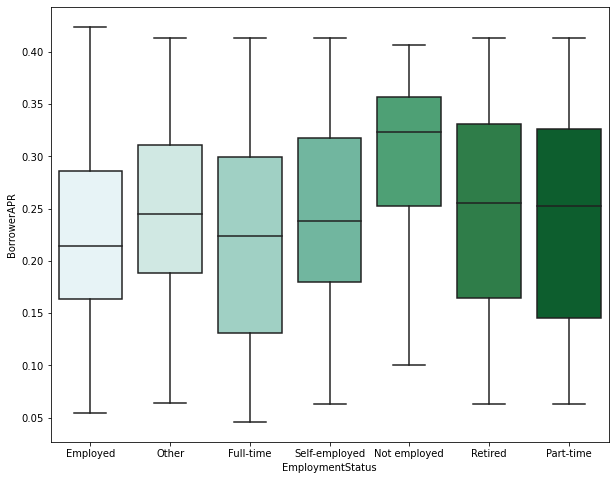

In [28]:
plt.figure(figsize = [10, 8])
sns.boxplot(data = df1, x = 'EmploymentStatus', y= 'BorrowerAPR', palette = 'BuGn')

I see that unemployed borrowers have greater APR and the employed borrowers have the least APR.


I'll plot a boxplot between ProsperRating and BorrowerAPR:

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='BorrowerAPR'>

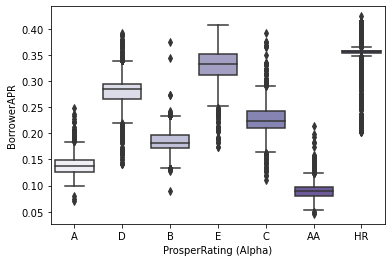

In [29]:
sns.boxplot(data = df1, x = 'ProsperRating (Alpha)', y= 'BorrowerAPR', palette = 'Purples')

I notice that the borrowers with the best Prosper ratings have the least APR.


I'll check the relation between EmploymentStatus and Terms:

<AxesSubplot:xlabel='EmploymentStatus', ylabel='count'>

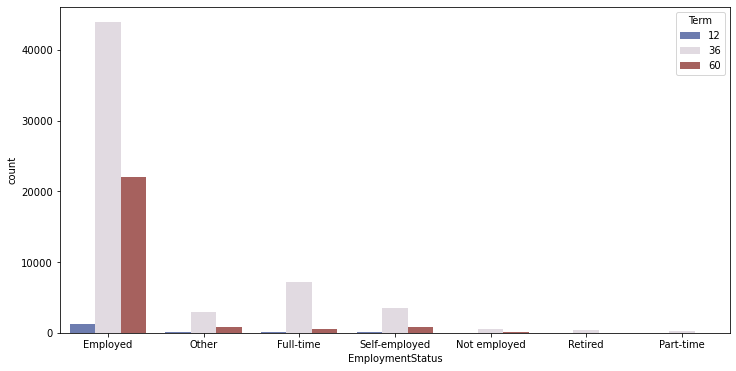

In [31]:
plt.figure(figsize = [12, 6])
sns.countplot(data = df1, x = 'EmploymentStatus', hue = 'Term', palette = 'twilight_shifted')

The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its relation with term.

I'll examine the relation between ProsperRating and Term:

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='count'>

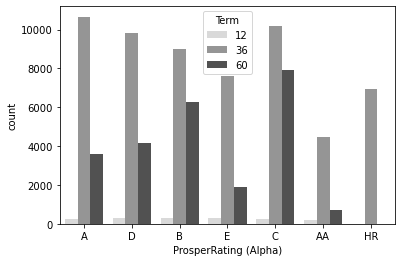

In [32]:
sns.countplot(data = df1, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Greys')

1. There are more 60 month loans on B and C ratings. 
2. There is only 36 months loans for HR rating borrowers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
1. The borrower APR is negatively correlated with the loan original amount, which mean the more the loan amount, the lower the APR. 
2. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. 
3. The Prosper rating also affects on the borrower APR, which decreases with the better rating.
4. Unemployed borrowers have greater APR and the employed borrowers have the least APR.
5. I notice that when the length of the loan in months is 36, the APR is the most and when the Term is 60, the APR is the least.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
1. There are more 60 month loans on B and C ratings. 
2. There is only 36 months loans for HR rating borrowers.
3. I noticed that employed, self-employed and those who belong to others category borrowers have more monthly income and loan amount than part-time, retired,full time and not employed borrowers.
4. I see that the current loans have the most amount being taken and chargedoff has the least.


## Multivariate Exploration:


I'll try to examine the relation between Rating, Loan Amount and Loan Status:

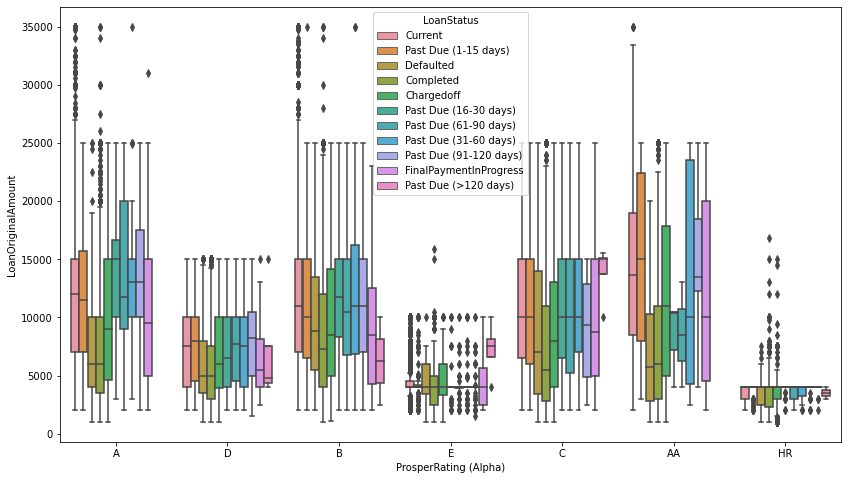

In [33]:
plt.figure(figsize = [14, 8])
sns.boxplot(data=df1, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');

1. I see that the borrowers with higher ratings have the most past Due(31-60 days) and past due(>120 days) loan amounts.
2. Except for the lowest ratings defaulted credits tend to be larger than completed.
3. Most of the defaulted credits comes from individuals with low Prosper rating.


I want to examine how the ProsperRating(Alpha) affects the relation between LoanOriginalAmount and BorrowerAPR:

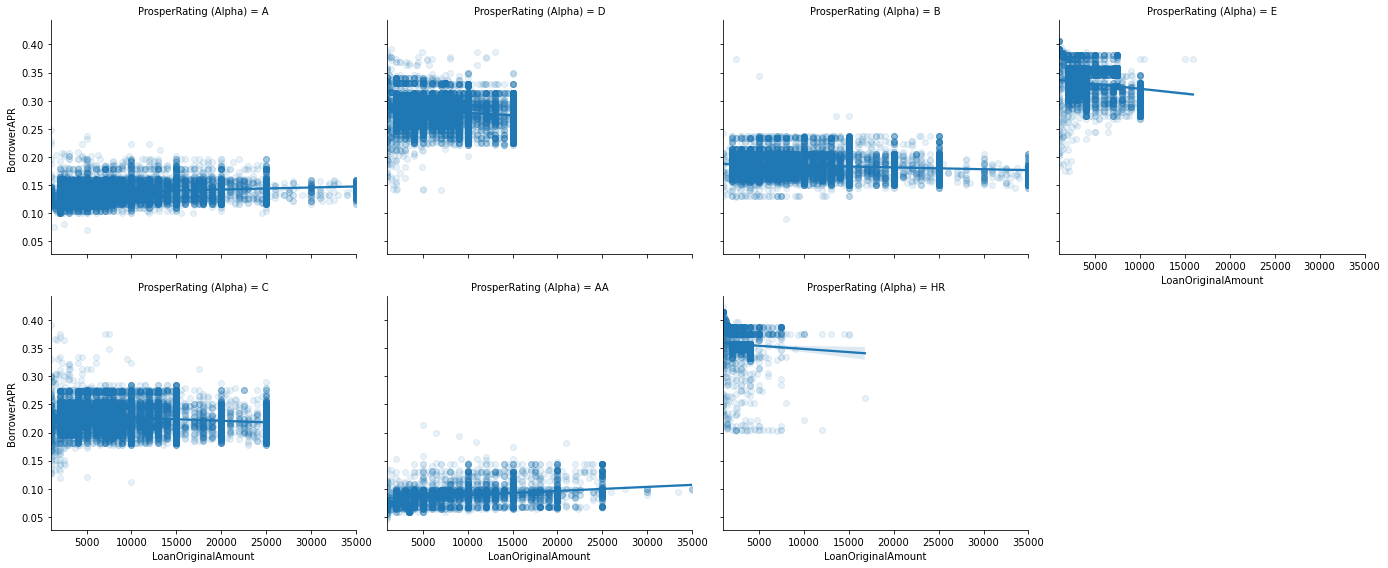

In [40]:
# Prosper rating effect on relationship of APR and loan amount
g=sns.FacetGrid(data=df1, aspect=1.2, height=4, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

1. The loan amount increases with better rating. 
2. The borrower APR decreases with better rating. 
3. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better.
This was expected as the bivariate explorations showed similar relations between the variables.

I want to explore in this part of the analysis is how term affects the relationship between borrower APR and loan original amount:

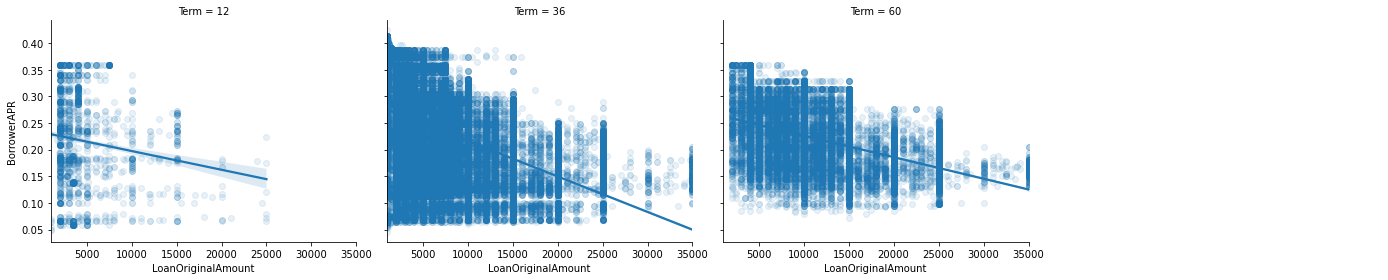

In [43]:
g=sns.FacetGrid(data=df1, aspect=1.2, height=4, col='Term', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

As I can see here, term doesnt really affects the relation between BorrowerAPR and loanoriginalamount, which remains negatively correlated throughout all the terms.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
1. term doesnt really affects the relation between BorrowerAPR and loanoriginalamount, which remains negatively correlated throughout all the terms.
2. The loan amount increases with better rating. 
3. The borrower APR decreases with better rating. 
4. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. 


### Sources:
https://github.com/justinolgui/Communicate-Data-Findings/blob/master/Prosper_Loan_Data_Analysis.ipynb

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

https://stackoverflow.com/questions/55729588/how-to-fix-the-truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-i

https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue

https://stackoverflow.com/search?q=value+error+max+arg+is+an+empty+sequence

https://stackoverflow.com/search?q=move-legend-outside-figure

https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

https://knowledge.udacity.com
